<h1>Data Analysis and Visualization Home Assignment</h1>
<li>I've tried to outline the steps for you so please make use of the cells
<li>If you run into data size issues, subset your data. But try to use as much as you can get away with
<li>Note that many of the steps will take a while to run, especially if your computer is not powerful enough. Be patient! 


<ol>
<li>Read the data from <b>yellow_tripdata_small_2016-01.csv</b>
<li>Remove any data that is outside the NYC bounding box
<ul>
<li>NYC bounding box: westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
<li>See http://boundingbox.klokantech.com for info on bounding boxes
</ul>
<li>Calculate taxi trip duration and save in a new column "duration"
<li>Convert duration into a float
<li>Do some basic analysis (see below)
<li>Add a day of week column
<li>Add an hour of day column
<li>Do some analysis (see below)
<li>Divide the data into zones
<ul>
<li>write a function createZoneTable(zone_factor) that divides the bounding box into zones
<li>the idea is to create zone_factor * zone_factor zones
<li>e.g., if zone_factor is 20, you'll create 20*20 = 400 zones
<li>Divide the longitude (-73.7526 to -74.2635) into zone_factor (e.g., 20) sections
<li>Divide the latitude (40.4856 to 40.9596) into zone_factor (e.g., 20) sections
<li>Return a table (a list of lists) containing a zone id, and the coordinates of the zone
<li>(see e.g., below)
</ul>
<li>Write a function get_zone(lon,lat) that figures out the zone given a latitude and longitude
<li>Apply this function to the dataframe, first with pickup lats and longs; then with dropoff lats and longs
<li>This will give two new "pickup_zone" and "dropoff_zone" columns
<li>Do some analysis (see below)
<li>Using folium, draw a heatmap of the number of trips originating in each zone
<ul>
<li>Create a geojson object for all the zones 
<li>Create a df that contains zone numbers and the number of trips originating in each zone
<li>Use folium to create a heatmap
<li><b>OPTIONAL:</b> You'll notice that the bounding box is much larger than New York City. Try to remove every zone that has 0 originating trips from your map. (Hint: You can remove them from the geojson object)


<h2>Read the data</h2>


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("yellow_tripdata_small_2016-01.csv")
df.head()
df.shape


(1090686, 19)

<h2>Remove data outside the bounding box</h2>


In [10]:
westlimit=-74.2635; southlimit=40.4856; eastlimit=-73.7526; northlimit=40.9596
#Remove the data that is not within the limits specified above
df = df[(df['pickup_longitude']>westlimit) & 
        (df['pickup_longitude']<eastlimit) &
        (df['dropoff_longitude']>westlimit) & 
        (df['dropoff_longitude']<eastlimit) &
        (df['pickup_latitude']<northlimit) & 
        (df['pickup_latitude']>southlimit) &
        (df['dropoff_latitude']<northlimit) & 
        (df['dropoff_latitude']>southlimit)]
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,40.752026,1,8.5,0.0,0.5,1.85,0.0,0.3,11.15
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,40.771893,1,6.0,0.0,0.5,1.36,0.0,0.3,8.16
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,40.707985,1,9.0,0.5,0.5,2.00,0.0,0.3,12.30
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,40.779671,1,4.5,0.0,0.5,1.30,0.0,0.3,6.60
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,40.769787,2,13.5,0.0,0.5,0.00,0.0,0.3,14.30


<h2>Add a column for taxi trip duration</h2>
<li>strptime formats: http://pubs.opengroup.org/onlinepubs/009695399/functions/strptime.html

In [11]:
import datetime
df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
df['tpep_dropoff_datetime'] = df['tpep_dropoff_datetime'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070406 entries, 0 to 1090685
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1070406 non-null  int64         
 1   tpep_pickup_datetime   1070406 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1070406 non-null  datetime64[ns]
 3   passenger_count        1070406 non-null  int64         
 4   trip_distance          1070406 non-null  float64       
 5   pickup_longitude       1070406 non-null  float64       
 6   pickup_latitude        1070406 non-null  float64       
 7   RatecodeID             1070406 non-null  int64         
 8   store_and_fwd_flag     1070406 non-null  object        
 9   dropoff_longitude      1070406 non-null  float64       
 10  dropoff_latitude       1070406 non-null  float64       
 11  payment_type           1070406 non-null  int64         
 12  fare_amount            10704

<h2>Convert duration column into a float (number of seconds)</h2>
<li><span style="color:blue">timedelta64(1, 's')</span> represents one second

In [13]:
df['duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()

<h2>Remove data where duration is greater than 10000 seconds</h2>

In [14]:
df = df[df['duration'] < 10000]

<h2>Plot duration and compare with a gamma distribution</h2>

C:\Users\Chris\AppData\Local\Temp\ipykernel_38604\1566930039.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


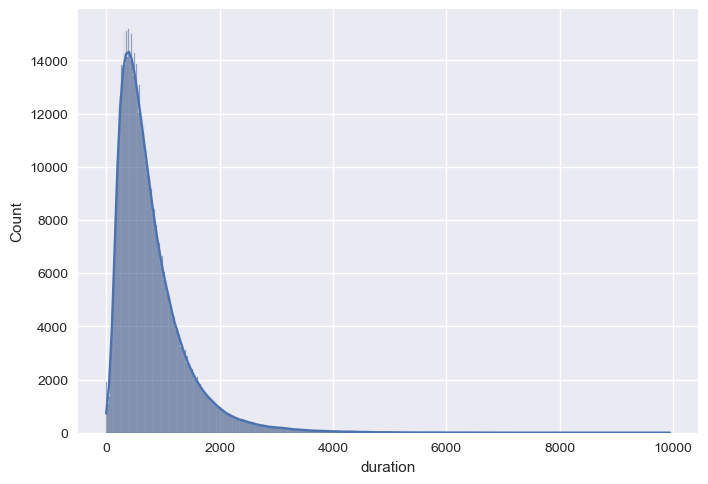

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.style.use('seaborn')
sns.histplot(df['duration'], kde=True)
plt.show()

<h2>Plot the scatter plot between trip_distance and duration</h2>

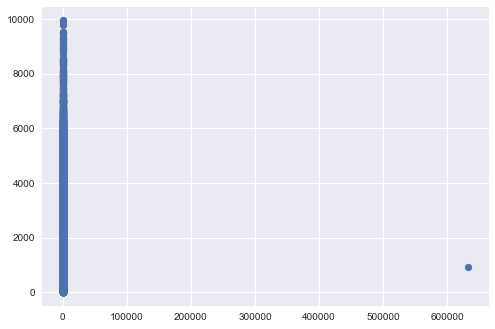

In [ ]:
trip_distance = df['trip_distance']
duration = df['duration']


fig, ax = plt.subplots()
plt.scatter(trip_distance, duration)

plt.show()

<h2>Create a column "day_of_week" that puts in an integer for the weekday</h2>
<li>Monday = 1, Sunday = 7
<li>Investigate here! https://docs.python.org/3/library/datetime.html
<li>Use tpep_pickup_datetime to get the weekday

In [20]:
df['day_of_week'] = df['tpep_pickup_datetime'].apply(datetime.date.isoweekday)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,1,8.5,0.0,0.5,1.85,0.0,0.3,11.15,657.0,1
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,1,6.0,0.0,0.5,1.36,0.0,0.3,8.16,365.0,3
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,1,9.0,0.5,0.5,2.00,0.0,0.3,12.30,502.0,2
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,1,4.5,0.0,0.5,1.30,0.0,0.3,6.60,194.0,7
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,2,13.5,0.0,0.5,0.00,0.0,0.3,14.30,1351.0,2


<h2>Create time of day buckets using the hour part of tpep_pickup_datetime</h2>

In [21]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,day_of_week,pickup_hour
0,1,2016-01-25 10:44:43,2016-01-25 10:55:40,1,1.00,-73.980652,40.765316,1,N,-73.989792,...,8.5,0.0,0.5,1.85,0.0,0.3,11.15,657.0,1,10
1,1,2016-01-13 10:19:36,2016-01-13 10:25:41,1,0.80,-73.948990,40.777428,1,N,-73.959045,...,6.0,0.0,0.5,1.36,0.0,0.3,8.16,365.0,3,10
2,2,2016-01-12 00:42:42,2016-01-12 00:51:04,1,2.17,-74.008377,40.735664,1,N,-74.013580,...,9.0,0.5,0.5,2.00,0.0,0.3,12.30,502.0,2,0
3,1,2016-01-10 16:21:17,2016-01-10 16:24:31,1,0.70,-73.961266,40.772495,1,N,-73.955887,...,4.5,0.0,0.5,1.30,0.0,0.3,6.60,194.0,7,16
4,2,2016-01-05 11:29:53,2016-01-05 11:52:24,5,0.78,-73.976532,40.764683,1,N,-73.966904,...,13.5,0.0,0.5,0.00,0.0,0.3,14.30,1351.0,2,11


<h2>Plot a bar graph that groups the data by day of week and then by time of day</h2>
<li>Do you notice any differences?</li>

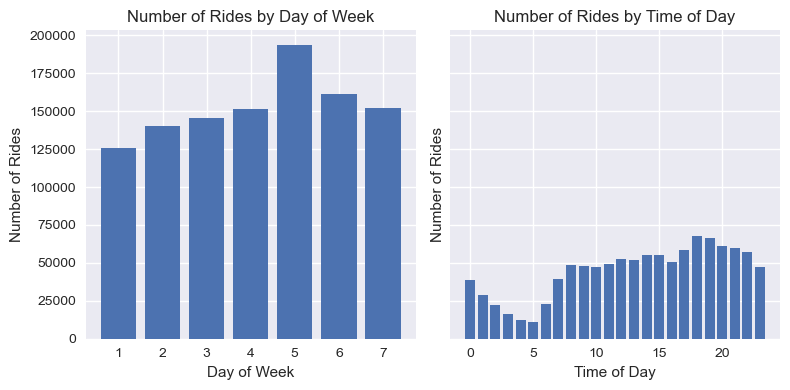

In [22]:
day_of_week = df['day_of_week'].value_counts()
time_of_day = df['pickup_hour'].value_counts()



fig, axs = plt.subplots(1, 2, figsize = (8,4), tight_layout = True, sharey = True)
axs[0].bar(day_of_week.index, day_of_week)
axs[0].set_title("Number of Rides by Day of Week")
axs[0].set_ylabel("Number of Rides")
axs[0].set_xlabel("Day of Week")
axs[0].set_xticks(day_of_week.index)

axs[1].bar(time_of_day.index, time_of_day)
axs[1].set_title("Number of Rides by Time of Day")
axs[1].set_ylabel("Number of Rides")
axs[1].set_xlabel("Time of Day")

plt.show()

### There are more rides later during the week
### There are more rides later in the day.

<h2>Create zones</h2>

In [23]:
def createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596):
    # Output is a list containing a tuple with 2 tiems:  zone # and limits of each zone
    zone_table = list()
    
    wl = westlimit
    sl = southlimit
    
    starting_point = [wl, sl]
    
#     long_incr = (southlimit-northlimit)/zone_factor
#     lat_incr = (eastlimit - westlimit)/zone_factor

    lat_incr = (northlimit - southlimit)/zone_factor
    long_incr = (eastlimit - westlimit)/zone_factor
    
    zone = 0
    
    for i in range(zone_factor):
        for j in range(zone_factor):
            if len(str(zone)) == 1:
                zone_string = "0" + str(zone)
            else:
                zone_string = str(zone)
            zone_table.append((zone_string, [starting_point,
                                    [starting_point[0]+long_incr, starting_point[1]],
                                    [starting_point[0]+long_incr, starting_point[1]+lat_incr],
                                    [starting_point[0], starting_point[1]+lat_incr],
                                    starting_point]))
            wl += long_incr
            starting_point = [wl,sl]
            zone += 1
        sl += lat_incr
        wl = westlimit
        starting_point = [wl, sl]
                
    return zone_table

In [26]:
x = createZoneTable(20)

In [29]:
type(x[0])

tuple

Example of a zone table

[('00',
  [[40.4856, -74.2635],
   [40.4856, -74.21240999999999],
   [40.533, -74.21240999999999],
   [40.533, -74.2635],
   [40.4856, -74.2635]]),
 ('01',
  [[40.4856, -74.21240999999999],
   [40.4856, -74.16131999999999],
   [40.533, -74.16131999999999],
   [40.533, -74.21240999999999],
   [40.4856, -74.21240999999999]]),
 ('02',
  [[40.4856, -74.16131999999999],
   [40.4856, -74.11022999999999],
   [40.533, -74.11022999999999],
   [40.533, -74.16131999999999],
   [40.4856, -74.16131999999999]]),
 ('03',
  [[40.4856, -74.11022999999999],
   [40.4856, -74.05913999999999],
   [40.533, -74.05913999999999],
   [40.533, -74.11022999999999],
   [40.4856, -74.11022999999999]]),

In [30]:
def createGeoJsonObject(zone_table):
     #Returns dictionary:
        # key-value pair: type : 'Feature Collection'
        # key-value pair: features: List filled with dictionaries assigned to data_point variable below:
    # {
    #     type: 'FeatureCollection',
    #     features: 
    #         [
    #         {"type": "Feature",
    #         "geometry": {"type": "Polygon", "coordinates": [zone]},
    #         "properties": {"zone_id": zone_number}
    #         } 
    #         ]
    # }
    # zone_data_dict = dict()
    zone_data_dict['type'] = 'FeatureCollection'
    zone_data_dict_features = list()
    zone_data_dict['features'] = zone_data_dict_features
    
    for z, l in zone_table: #unpacking the tuples in list
        zone_number, zone = z, l
        data_point = {"type": "Feature",
            "geometry": {"type": "Polygon", "coordinates": [zone]},
            "properties": {"zone_id": zone_number}
            }
        zone_data_dict_features.append(data_point)
    
    return zone_data_dict

Example of the 'features' list in the geojson object

{'features': [{'geometry': {'coordinates': [[[-74.2635, 40.4856],
      [-74.21240999999999, 40.4856],
      [-74.21240999999999, 40.533],
      [-74.2635, 40.533],
      [-74.2635, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '00'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.21240999999999, 40.4856],
      [-74.16131999999999, 40.4856],
      [-74.16131999999999, 40.533],
      [-74.21240999999999, 40.533],
      [-74.21240999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '01'},
   'type': 'Feature'},
  {'geometry': {'coordinates': [[[-74.16131999999999, 40.4856],
      [-74.11022999999999, 40.4856],
      [-74.11022999999999, 40.533],
      [-74.16131999999999, 40.533],
      [-74.16131999999999, 40.4856]]],
    'type': 'Polygon'},
   'properties': {'zone_id': '02'},
   'type': 'Feature'},

<h3>Create the zone table for zone_factor = 20</h3>

In [31]:
zone_factor = 20
zone_table = createZoneTable(zone_factor,westlimit=-74.2635, southlimit=40.4856, eastlimit=-73.7526, northlimit=40.9596)
zone_data = createGeoJsonObject(zone_table)

In [32]:
zone_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-74.2635, 40.4856],
      [-74.237955, 40.4856],
      [-74.237955, 40.509299999999996],
      [-74.2635, 40.509299999999996],
      [-74.2635, 40.4856]]]},
   'properties': {'zone_id': '00'}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-74.237955, 40.4856],
      [-74.21241, 40.4856],
      [-74.21241, 40.509299999999996],
      [-74.237955, 40.509299999999996],
      [-74.237955, 40.4856]]]},
   'properties': {'zone_id': '01'}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-74.21241, 40.4856],
      [-74.18686500000001, 40.4856],
      [-74.18686500000001, 40.509299999999996],
      [-74.21241, 40.509299999999996],
      [-74.21241, 40.4856]]]},
   'properties': {'zone_id': '02'}},
  {'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-74.18686500000001, 40.4856],
      [

<h2>Write a function that returns a zone number given a latitude and a longitude</h2>

<li>The function should return a string zone number
<li>For the example, <span style="color:blue">get_zone(-74.19,40.65)</span> the function should return "62" (for a zone factor of 20, assuming you have numbered the zones from 1 to 400)

In [33]:
def get_zone(lon,lat,zone_table):
    zone = ''
    for i in range(len(zone_table)):
        if lon >= zone_table[i][1][0][0]:
            if lon <= zone_table[i][1][2][0]:
                if lat >= zone_table[i][1][0][1]:
                    if lat <= zone_table[i][1][2][1]:
                        zone += zone_table[i][0]
    return zone

In [34]:
get_zone(-74.19, 40.65, zone_table)

'122'

<h2>Create  pickup_zone and dropoff_zone columns for the dataframe</h2>
<li>This is a little tricky
<li>Pandas 'apply' function applies a function to each row in turn


<h4>apply</h4>

df.apply(foo)<br>
translates to<br>
foo(row1)<br>
foo(row2)<br>
foo(row3)<br>
i.e., the table row is the implicit argument of foo.
<p>
If we want to write our own foo, the argument to foo will be a dataframe row.<p>
From this row, we can extract the values we want and pass it to the explicit arguments of foo
<p>


In [2]:
import pandas as pd
df_sample = pd.DataFrame([[1,5,7],[2,4,6],[3,9,2]],columns=['A','B','C'])

print(df_sample)
def foo(x,y):
    return x+y

df_sample['new_col'] = df_sample.apply(lambda x: foo(x['A'],x['B']),axis=1)
#axis = 1 means extract data from rows of the dataframe. by default, it extracts from columns. (Set axis to 0 and see what happens)

df_sample

   A  B  C
0  1  5  7
1  2  4  6
2  3  9  2


,A,B,C,new_col
0,1,5,7,6
1,2,4,6,6
2,3,9,2,12


In [35]:
df['pickup_zone'] = df.apply(lambda x: get_zone(x['pickup_longitude'], x['pickup_latitude'], zone_table), axis = 1)
df['dropoff_zone'] = df.apply(lambda x: get_zone(x['dropoff_longitude'], x['dropoff_latitude'], zone_table), axis = 1)

<h2>Calculate the following</h2>
<li>Percentage of the total rides where the pickup zone is the same as the dropoff zone
<li>Zone with the highest pickups
<li>Zone with the highest dropoffs

In [36]:
df['same_zone'] = np.where(df['pickup_zone'] == df['dropoff_zone'], 1, 0)
percentage_same_zone = df['same_zone'].sum()/df['same_zone'].count()
percentage_same_zone

0.23668056081849184

In [37]:
highest_pickups = df.groupby('pickup_zone').size().sort_values(ascending = False)
print("Zone with the highest pickups: ", highest_pickups.idxmax())

Zone with the highest pickups:  231


In [38]:
highest_dropoffs = df.groupby('dropoff_zone').size().sort_values(ascending = False)
print("Zone with the highest dropoffs: ", highest_dropoffs.idxmax())

Zone with the highest dropoffs:  231


<h2>Groupby analysis</h2>
<li>Group data by the hour of the day and by the pickup zone
<li>Draw a figure of 24 plots that show the top 5 pickup zones at each hour


In [40]:

top5 = df.groupby(['pickup_hour','pickup_zone']).size().unstack(0)

top5

%matplotlib inline
COL_NUM = 2
ROW_NUM = 12
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(15,15), sharex = True )

for i, (pickup_hour, pickup_zone) in enumerate(top5.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    pickup_zone = pickup_zone.sort_values(ascending=False)[:5] 
    pickup_zone.plot(kind='barh', ax=ax)
    ax.set_title(pickup_hour)
    plt.tight_layout()


pickup_hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
pickup_zone,,,,,,,,,,,,,,,,,,,,,
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
108,1.0,NaN,2.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,4.0,2.0,2.0,2.0,1.0,NaN,1.0,NaN,NaN,NaN,...,1.0,2.0,NaN,1.0,NaN,NaN,NaN,2.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<h2>Groupby analysis 2</h2>
<li>Group data by the weekday and the pickup zone
<li>Draw a figure of 7 plots that show the top 5 pickup zones on each day

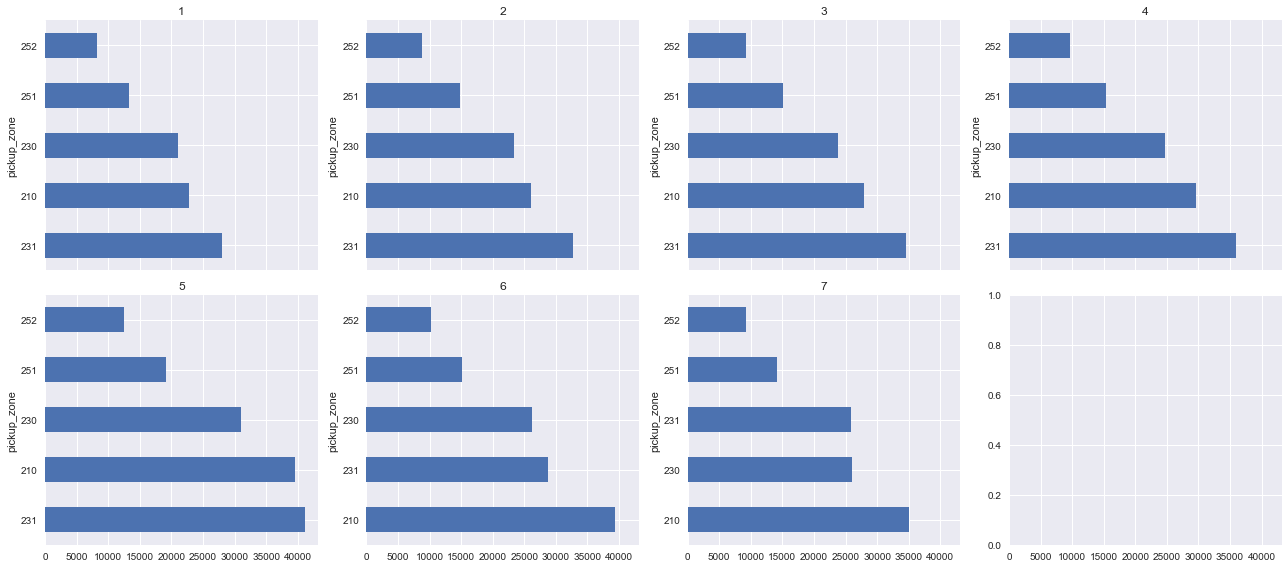

In [25]:
top5_per_day = df.groupby(['day_of_week','pickup_zone']).size().unstack(0)

top5_per_day

%matplotlib inline
COL_NUM = 4
ROW_NUM = 2
import matplotlib.pyplot as plt
fig, axes = plt.subplots(ROW_NUM, COL_NUM, figsize=(18,8), sharex = True )

for i, (day_of_week, pickup_zone) in enumerate(top5_per_day.items()): 
    ax = axes[int(i/COL_NUM), i%COL_NUM]
    pickup_zone = pickup_zone.sort_values(ascending=False)[:5] 
    pickup_zone.plot(kind='barh', ax=ax)
    ax.set_title(day_of_week)
    plt.tight_layout()

<h1>Most frequent morning pickups</h1>
<li>Identify the most frequent pickup zone between 8 am and 9 am on a weekday



In [26]:
morning_pickup = df[(df['pickup_hour'] >=8) & (df['pickup_hour'] <=9) & (df['day_of_week'] < 6)]
mornings = morning_pickup.groupby('pickup_zone').size().sort_values(ascending = False).idxmax()
print("Most frequent morning pickups are in zone: ", mornings)

Most frequent morning pickups are in zone:  231


<h2>Mapping</h2>
<li>Draw a folium map using the polygon geojson object and the counts dataframe (see class example)
<li>Using folium, draw a heatmap of the number of trips originating in each zone
<ul>
<li>Create a geojson object for all the zones 
<li>Create a df that contains zone numbers and the number of trips originating in each zone
<li>Use folium to create a heatmap
<li><b>OPTIONAL:</b> You'll notice that the bounding box is much larger than New York City. Try to remove every zone that has 0 originating trips from your map. (Hint: You can remove them from the geojson object)

In [27]:
## DataFrame containing zone numbers and number of trips orginating (Pickup_zone) in each zone

zone_groups = df.groupby("pickup_zone")
sizes = pd.DataFrame(zone_groups.size())
sizes.rename(columns = {0:'size'}, inplace = True)
sizes.reset_index(level = 0, inplace = True)
sizes['Zone'] = sizes['pickup_zone']
sizes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   pickup_zone  207 non-null    object
 1   size         207 non-null    int64 
 2   Zone         207 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.0+ KB


In [28]:
import folium
import geojson

#set time square as center of map
m = folium.Map(location = [40.7589, -73.9851],zoom_start=12)

# folium.GeoJson(zone_data).add_to(m)

m.choropleth(geo_data = zone_data, data = sizes,
             columns = ['Zone', 'size'],
            key_on = 'feature.properties.zone_id',
            fill_color = 'RdYlGn', fill_opacity = 0.4, line_opacity = 0.5,
            legend_name = 'Distribution of PickUps')

folium.LayerControl().add_to(m)

C:\Users\Chris\anaconda3\lib\site-packages\folium\folium.py:409: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [29]:
m